# Importación de Librerías.

In [28]:
import pandas as pd
import numpy as np


%matplotlib inline


import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

# Lectura de Datos.

In [29]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')

test_values = pd.read_csv('test_values.csv', index_col='building_id')
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')

# Verificamos datos nulos en los sets de datos.

In [30]:
sum(train_values.isnull().values.ravel())

0

In [31]:
sum(test_values.isnull().values.ravel())

0

In [32]:
sum(train_labels.isnull().values.ravel())

0

In [33]:
sum(submission_format.isnull().values.ravel())

0

Como podemos verificar, no hay ninguna celda con valor NaN en todos los Datasets que se nos brindaron.  

# Creación de Scorer.

In [34]:
f1 = make_scorer(f1_score , average='micro')

# Feature Engineering

In [35]:
#Geo Level Id 1. 

train_values.geo_level_1_id.describe() 

train_values['geo_level_1_id_less_than_10'] = [1 if (x <= 10) else 0 for x in train_values['geo_level_1_id']]

train_values['geo_level_1_id_10_20'] = [1 if ((x <= 20) & (x > 10))  else 0 \
                                        for x in train_values['geo_level_1_id']]

train_values['geo_level_1_id_higher_than_20'] = [1 if (x > 20) else 0 for x in train_values['geo_level_1_id']]


#Hacemos lo mismo para el set de Test. 


test_values['geo_level_1_id_less_than_10'] = [1 if (x <= 10) else 0 for x in test_values['geo_level_1_id']]

test_values['geo_level_1_id_10_20'] = [1 if ((x <= 20) & (x > 10))  else 0 \
                                        for x in test_values['geo_level_1_id']]

test_values['geo_level_1_id_higher_than_20'] = [1 if (x > 20) else 0 for x in test_values['geo_level_1_id']]

In [36]:
#Geo Level Id 2. 

train_values.geo_level_2_id.describe() 

train_values['geo_level_2_id_less_than_500'] = [1 if (x <= 500) else 0 for x in train_values['geo_level_2_id']]

train_values['geo_level_2_id_500_1000'] = [1 if ((x <= 1000) & (x > 500)) \
                                           else 0 for x in train_values['geo_level_2_id']]

train_values['geo_level_2_id_higher_than_1000'] = [1 if (x > 1000) else 0 for x in train_values['geo_level_2_id']]


#Hacemos lo mismo para el set de Test.


test_values['geo_level_2_id_less_than_500'] = [1 if (x <= 500) else 0 for x in test_values['geo_level_2_id']]

test_values['geo_level_2_id_500_1000'] = [1 if ((x <= 1000) & (x > 500)) \
                                           else 0 for x in test_values['geo_level_2_id']]

test_values['geo_level_2_id_higher_than_1000'] = [1 if (x > 1000) else 0 for x in test_values['geo_level_2_id']]

In [37]:
#Geo Level Id 3. 

train_values.geo_level_3_id.describe() 

train_values['geo_level_3_id_less_than_4000'] = [1 if (x <= 4000) else 0 for x in train_values['geo_level_3_id']]

train_values['geo_level_3_id_4000_8000'] = [1 if ((x <= 8000) & (x > 4000))  \
                                            else 0 for x in train_values['geo_level_3_id']]

train_values['geo_level_3_id_higher_than_8000'] = [1 if (x > 8000) else 0 for x in train_values['geo_level_3_id']]



#Hacemos lo mismo para el set de Test.


test_values['geo_level_3_id_less_than_4000'] = [1 if (x <= 4000) else 0 for x in test_values['geo_level_3_id']]

test_values['geo_level_3_id_4000_8000'] = [1 if ((x <= 8000) & (x > 4000))  \
                                            else 0 for x in test_values['geo_level_3_id']]

test_values['geo_level_3_id_higher_than_8000'] = [1 if (x > 8000) else 0 for x in test_values['geo_level_3_id']]



In [38]:
#Count Floors Pre Eq.

count_floors_pre_eq_mean = train_values['count_floors_pre_eq'].mean()

train_values['count_floor_pre_eq_higher_than_mean'] = [1 if\
                    (x > count_floors_pre_eq_mean) else 0 for x in train_values['count_floors_pre_eq']] 



#Hacemos lo mismo para el set de Test.


count_floors_pre_eq_mean = test_values['count_floors_pre_eq'].mean()

test_values['count_floor_pre_eq_higher_than_mean'] = [1 if\
                    (x > count_floors_pre_eq_mean) else 0 for x in test_values['count_floors_pre_eq']] 

In [39]:
#Age. 

train_values.age.describe()

train_values['age_less_than_20'] = [1 if (x <= 20) else 0 for x in train_values['age']]

train_values['age_20_50'] = [1 if ((x <= 50) & (x > 20))  else 0 for x in train_values['age']]

train_values['age_higher_than_50'] = [1 if (x > 50) else 0 for x in train_values['age']]



#Hacemos lo mismo para el set de Test.


test_values['age_less_than_20'] = [1 if (x <= 20) else 0 for x in test_values['age']]

test_values['age_20_50'] = [1 if ((x <= 50) & (x > 20))  else 0 for x in test_values['age']]

test_values['age_higher_than_50'] = [1 if (x > 50) else 0 for x in test_values['age']]

In [40]:
#Area and Height Percentage. Volume Percentage. 

train_values['volume_percetage'] = (train_values['area_percentage'] * train_values['height_percentage'])



#Hacemos lo mismo para el set de Test.


test_values['volume_percetage'] = (test_values['area_percentage'] * test_values['height_percentage'])

In [41]:
#Position. 

train_values = train_values.drop('position',1)


#Hacemos lo mismo para el set de Test.



test_values = test_values.drop('position',1)

In [42]:
#Materiales.

train_values['weak_superstructure'] = np.where( ( (train_values.has_superstructure_mud_mortar_stone == 1) |  \
                                       (train_values.has_superstructure_adobe_mud == 1) \
                                           | (train_values.has_superstructure_stone_flag == 1)  \
                                           | (train_values.has_superstructure_mud_mortar_brick == 1)   \
                                            | (train_values.has_superstructure_timber == 1)   \
                                            | (train_values.has_superstructure_bamboo == 1)    ), 1, 0)

train_values['strong_superstructure'] = np.where( ( (train_values.has_superstructure_cement_mortar_brick == 1) | \
                                       (train_values.has_superstructure_rc_non_engineered == 1) \
                                           | (train_values.has_superstructure_rc_engineered == 1)  ), 1, 0)


#Hacemos lo mismo para el set de Test.


test_values['weak_superstructure'] = np.where( ( (test_values.has_superstructure_mud_mortar_stone == 1) |  \
                                       (test_values.has_superstructure_adobe_mud == 1) \
                                           | (test_values.has_superstructure_stone_flag == 1)  \
                                           | (test_values.has_superstructure_mud_mortar_brick == 1)   \
                                            | (test_values.has_superstructure_timber == 1)   \
                                            | (test_values.has_superstructure_bamboo == 1)    ), 1, 0)

test_values['strong_superstructure'] = np.where( ( (test_values.has_superstructure_cement_mortar_brick == 1) | \
                                       (test_values.has_superstructure_rc_non_engineered == 1) \
                                           | (test_values.has_superstructure_rc_engineered == 1)  ), 1, 0)

In [43]:
#Count_families.

train_values['has_family'] = [1 if (x >= 1) else 0 for x in train_values['count_families']] 


#Hacemos lo mismo para el set de Test.

test_values['has_family'] = [1 if (x >= 1) else 0 for x in test_values['count_families']]

In [44]:
#Usos secundarios.

train_values['cantidad_usos_secundarios'] = train_values['has_secondary_use_agriculture'] + \
                                             train_values['has_secondary_use_hotel'] + \
                                              train_values['has_secondary_use_rental'] + \
                                              train_values['has_secondary_use_institution'] + \
                                             train_values['has_secondary_use_school'] + \
                                                train_values['has_secondary_use_industry'] + \
                                             train_values['has_secondary_use_health_post'] + \
                                                train_values['has_secondary_use_gov_office'] + \
                                                train_values['has_secondary_use_use_police'] + \
                                                train_values['has_secondary_use_other']

train_values = train_values.drop('has_secondary_use',1)

#Ya podemos deshacernos de esta columna, ya que tenemos una nueva que nos da la misma informacion, e incluso mas.


#Hacemos lo mismo para el set de Test.


test_values['cantidad_usos_secundarios'] = test_values['has_secondary_use_agriculture'] + \
                                             test_values['has_secondary_use_hotel'] + \
                                              test_values['has_secondary_use_rental'] + \
                                              test_values['has_secondary_use_institution'] + \
                                             test_values['has_secondary_use_school'] + \
                                                test_values['has_secondary_use_industry'] + \
                                             test_values['has_secondary_use_health_post'] + \
                                                test_values['has_secondary_use_gov_office'] + \
                                                test_values['has_secondary_use_use_police'] + \
                                                test_values['has_secondary_use_other']

test_values = test_values.drop('has_secondary_use',1)


# Variables Categóricas. 

In [45]:
#Land Surface Condition.



train_values.land_surface_condition.value_counts()

#Revisamos los posibles valores de esta columna. 

#Creamos entonces dos columnas mas para poder encodear en binario esta variable categorica.  


train_values['land_surface_condition_2'] = np.where( ( train_values.land_surface_condition == 'n' ), 1, 0)
train_values['land_surface_condition_1'] = np.where( ( train_values.land_surface_condition == 'o' ), 1, 0)

train_values = train_values.drop('land_surface_condition',1)



#Hacemos lo mismo para el set de Test.


test_values['land_surface_condition_2'] = np.where( ( test_values.land_surface_condition == 'n' ), 1, 0)
test_values['land_surface_condition_1'] = np.where( ( test_values.land_surface_condition == 'o' ), 1, 0)

test_values = test_values.drop('land_surface_condition',1)

In [46]:
#Foundation Type. 

train_values.foundation_type.value_counts()

#Revisamos los posibles valores de esta columna.

#Creamos entonces tres columnas mas para poder encodear en binario esta variable categorica.

train_values['foundation_type_1'] = np.where( ( train_values.foundation_type == 'h' ), 1, 0)

train_values['foundation_type_2'] = np.where( ( (train_values.foundation_type == 'u') | \
                                                     (train_values.foundation_type == 'i') ), 1, 0)

train_values['foundation_type_3'] = np.where( ( (train_values.foundation_type == 'w') | \
                                                     (train_values.foundation_type == 'i') ), 1, 0)

train_values = train_values.drop('foundation_type',1)

#Hacemos lo mismo para el set de Test.

test_values['foundation_type_1'] = np.where( ( test_values.foundation_type == 'h' ), 1, 0)

test_values['foundation_type_2'] = np.where( ( (test_values.foundation_type == 'u') | \
                                                     (test_values.foundation_type == 'i') ), 1, 0)

test_values['foundation_type_3'] = np.where( ( (test_values.foundation_type == 'w') | \
                                                     (test_values.foundation_type == 'i') ), 1, 0)

test_values = test_values.drop('foundation_type',1)

In [47]:
#Roof Type.

train_values.roof_type.value_counts()

#Revisamos los posibles valores de esta columna.

#Creamos entonces dos columnas mas para poder encodear en binario esta variable categorica.

train_values['roof_type_1'] = np.where( ( train_values.roof_type == 'x' ), 1, 0)
train_values['roof_type_2'] = np.where( ( train_values.roof_type == 'q' ), 1, 0)

train_values = train_values.drop('roof_type',1)

#Hacemos lo mismo para el set de Test.

test_values['roof_type_1'] = np.where( ( test_values.roof_type == 'x' ), 1, 0)
test_values['roof_type_2'] = np.where( ( test_values.roof_type == 'q' ), 1, 0)

test_values = test_values.drop('roof_type',1)

In [48]:
# Ground Floor Type.

train_values.ground_floor_type.value_counts()

#Revisamos los posibles valores de esta columna.

#Creamos entonces tres columnas mas para poder encodear en binario esta variable categorica.

train_values['ground_floor_type_1'] = np.where( ( train_values.ground_floor_type == 'm' ), 1, 0)

train_values['ground_floor_type_2'] = np.where( ( (train_values.ground_floor_type == 'v') | \
                                                     (train_values.ground_floor_type == 'z') ), 1, 0)

train_values['ground_floor_type_3'] = np.where( ( (train_values.ground_floor_type == 'x') | \
                                                     (train_values.ground_floor_type == 'z') ), 1, 0)

train_values = train_values.drop('ground_floor_type',1)



#Hacemos lo mismo para el set de Test.

test_values['ground_floor_type_1'] = np.where( ( test_values.ground_floor_type == 'm' ), 1, 0)

test_values['ground_floor_type_2'] = np.where( ( (test_values.ground_floor_type == 'v') | \
                                                     (test_values.ground_floor_type == 'z') ), 1, 0)

test_values['ground_floor_type_3'] = np.where( ( (test_values.ground_floor_type == 'x') | \
                                                     (test_values.ground_floor_type == 'z') ), 1, 0)

test_values = test_values.drop('ground_floor_type',1)

In [49]:
#Other Floor Type. 

train_values.other_floor_type.value_counts()

#Revisamos los posibles valores de esta columna.

#Creamos entonces dos columnas mas para poder encodear en binario esta variable categorica.

train_values['other_floor_type_1'] = np.where( ( (train_values.other_floor_type == 'j') | \
                                                     (train_values.other_floor_type == 's') ), 1, 0)

train_values['other_floor_type_2'] = np.where( ( (train_values.other_floor_type == 'x') | \
                                                     (train_values.other_floor_type == 's') ), 1, 0)

train_values = train_values.drop('other_floor_type',1)

#Hacemos lo mismo para el set de Test.

test_values['other_floor_type_1'] = np.where( ( (test_values.other_floor_type == 'j') | \
                                                     (test_values.other_floor_type == 's') ), 1, 0)

test_values['other_floor_type_2'] = np.where( ( (test_values.other_floor_type == 'x') | \
                                                     (test_values.other_floor_type == 's') ), 1, 0)

test_values = test_values.drop('other_floor_type',1)

In [50]:
#Plan Configuration

train_values.plan_configuration.value_counts()

#Revisamos los posibles valores de esta columna.

#Creamos entonces cuatro columnas mas para poder encodear en binario esta variable categorica.

train_values['plan_configuration_1'] = np.where( ( (train_values.plan_configuration == 'n') | \
                                                     (train_values.plan_configuration == 'f') ), 1, 0)

train_values['plan_configuration_2'] = np.where( ( (train_values.plan_configuration == 'c') | \
                                                     (train_values.plan_configuration == 'a') | \
                                                     (train_values.plan_configuration == 'o') | \
                                                     (train_values.plan_configuration == 'm') ), 1, 0)

train_values['plan_configuration_3'] = np.where( ( (train_values.plan_configuration == 'u') | \
                                                     (train_values.plan_configuration == 's') | \
                                                     (train_values.plan_configuration == 'o') | \
                                                     (train_values.plan_configuration == 'm') ), 1, 0)

train_values['plan_configuration_4'] = np.where( ( (train_values.plan_configuration == 'q') | \
                                                     (train_values.plan_configuration == 's') | \
                                                     (train_values.plan_configuration == 'a') | \
                                                     (train_values.plan_configuration == 'm') | \
                                                     (train_values.plan_configuration == 'f') ), 1, 0)

train_values = train_values.drop('plan_configuration',1)

#Hacemos lo mismo para el set de Test.

test_values['plan_configuration_1'] = np.where( ( (test_values.plan_configuration == 'n') | \
                                                     (test_values.plan_configuration == 'f') ), 1, 0)

test_values['plan_configuration_2'] = np.where( ( (test_values.plan_configuration == 'c') | \
                                                     (test_values.plan_configuration == 'a') | \
                                                     (test_values.plan_configuration == 'o') | \
                                                     (test_values.plan_configuration == 'm') ), 1, 0)

test_values['plan_configuration_3'] = np.where( ( (test_values.plan_configuration == 'u') | \
                                                     (test_values.plan_configuration == 's') | \
                                                     (test_values.plan_configuration == 'o') | \
                                                     (test_values.plan_configuration == 'm') ), 1, 0)

test_values['plan_configuration_4'] = np.where( ( (test_values.plan_configuration == 'q') | \
                                                     (test_values.plan_configuration == 's') | \
                                                     (test_values.plan_configuration == 'a') | \
                                                     (test_values.plan_configuration == 'm') | \
                                                     (test_values.plan_configuration == 'f') ), 1, 0)

test_values = test_values.drop('plan_configuration',1)


In [51]:
#Legal Ownership Status 

train_values.legal_ownership_status.value_counts()

#Revisamos los posibles valores de esta columna.

#Creamos entonces dos columnas mas para poder encodear en binario esta variable categorica.

train_values['legal_ownership_status_1'] = np.where( ( (train_values.legal_ownership_status == 'w') | \
                                                     (train_values.legal_ownership_status == 'r') ), 1, 0)

train_values['legal_ownership_status_2'] = np.where( ( (train_values.legal_ownership_status == 'a') | \
                                                     (train_values.legal_ownership_status == 'r') ), 1, 0)

train_values = train_values.drop('legal_ownership_status',1)

#Hacemos lo mismo para el set de Test.

test_values['legal_ownership_status_1'] = np.where( ( (test_values.legal_ownership_status == 'w') | \
                                                     (test_values.legal_ownership_status == 'r') ), 1, 0)

test_values['legal_ownership_status_2'] = np.where( ( (test_values.legal_ownership_status == 'a') | \
                                                     (test_values.legal_ownership_status == 'r') ), 1, 0)

test_values = test_values.drop('legal_ownership_status',1)

# Tuning de Hiperparámetros.

In [52]:
parameters = {'depth'         : [9],
              'learning_rate' : [0.1],  
              'l2_leaf_reg': [1],
              'border_count' : [200],  
              'iterations'    : [1500], 
              'random_strength' : [-35],  
              'bagging_temperature' : [1]
                 }   

model = CatBoostClassifier()

Grid_CBC = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1, scoring = f1)

Grid_CBC.fit(train_values, train_labels)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_) 

0:	learn: 1.0588826	total: 140ms	remaining: 3m 30s
1:	learn: 1.0273539	total: 279ms	remaining: 3m 28s
2:	learn: 0.9983656	total: 437ms	remaining: 3m 38s
3:	learn: 0.9757625	total: 541ms	remaining: 3m 22s
4:	learn: 0.9560844	total: 695ms	remaining: 3m 27s
5:	learn: 0.9342511	total: 845ms	remaining: 3m 30s
6:	learn: 0.9217931	total: 1s	remaining: 3m 33s
7:	learn: 0.9074945	total: 1.15s	remaining: 3m 34s
8:	learn: 0.8944103	total: 1.31s	remaining: 3m 36s
9:	learn: 0.8814344	total: 1.46s	remaining: 3m 36s
10:	learn: 0.8723515	total: 1.61s	remaining: 3m 38s
11:	learn: 0.8642953	total: 1.76s	remaining: 3m 38s
12:	learn: 0.8561205	total: 1.92s	remaining: 3m 39s
13:	learn: 0.8468139	total: 2.06s	remaining: 3m 39s
14:	learn: 0.8372170	total: 2.22s	remaining: 3m 40s
15:	learn: 0.8309563	total: 2.33s	remaining: 3m 36s
16:	learn: 0.8247888	total: 2.49s	remaining: 3m 36s
17:	learn: 0.8186570	total: 2.65s	remaining: 3m 38s
18:	learn: 0.8136081	total: 2.81s	remaining: 3m 38s
19:	learn: 0.8092549	tota

159:	learn: 0.6813931	total: 23.5s	remaining: 3m 16s
160:	learn: 0.6805465	total: 23.6s	remaining: 3m 16s
161:	learn: 0.6793899	total: 23.8s	remaining: 3m 16s
162:	learn: 0.6783535	total: 23.9s	remaining: 3m 16s
163:	learn: 0.6776231	total: 24.1s	remaining: 3m 16s
164:	learn: 0.6768452	total: 24.2s	remaining: 3m 16s
165:	learn: 0.6757297	total: 24.4s	remaining: 3m 15s
166:	learn: 0.6748957	total: 24.5s	remaining: 3m 15s
167:	learn: 0.6734783	total: 24.7s	remaining: 3m 15s
168:	learn: 0.6726867	total: 24.8s	remaining: 3m 15s
169:	learn: 0.6720189	total: 25s	remaining: 3m 15s
170:	learn: 0.6713680	total: 25.1s	remaining: 3m 15s
171:	learn: 0.6704398	total: 25.3s	remaining: 3m 15s
172:	learn: 0.6699188	total: 25.4s	remaining: 3m 15s
173:	learn: 0.6689546	total: 25.6s	remaining: 3m 15s
174:	learn: 0.6683056	total: 25.7s	remaining: 3m 14s
175:	learn: 0.6676156	total: 25.9s	remaining: 3m 14s
176:	learn: 0.6665339	total: 26s	remaining: 3m 14s
177:	learn: 0.6657204	total: 26.2s	remaining: 3m 1

317:	learn: 0.6112001	total: 47.7s	remaining: 2m 57s
318:	learn: 0.6110329	total: 47.8s	remaining: 2m 57s
319:	learn: 0.6107905	total: 48s	remaining: 2m 56s
320:	learn: 0.6105548	total: 48.1s	remaining: 2m 56s
321:	learn: 0.6103245	total: 48.3s	remaining: 2m 56s
322:	learn: 0.6101735	total: 48.4s	remaining: 2m 56s
323:	learn: 0.6099333	total: 48.6s	remaining: 2m 56s
324:	learn: 0.6097372	total: 48.7s	remaining: 2m 56s
325:	learn: 0.6094772	total: 48.9s	remaining: 2m 56s
326:	learn: 0.6093265	total: 49s	remaining: 2m 55s
327:	learn: 0.6091426	total: 49.2s	remaining: 2m 55s
328:	learn: 0.6090139	total: 49.4s	remaining: 2m 55s
329:	learn: 0.6087820	total: 49.5s	remaining: 2m 55s
330:	learn: 0.6086384	total: 49.7s	remaining: 2m 55s
331:	learn: 0.6083482	total: 49.8s	remaining: 2m 55s
332:	learn: 0.6080967	total: 50s	remaining: 2m 55s
333:	learn: 0.6078602	total: 50.1s	remaining: 2m 54s
334:	learn: 0.6075711	total: 50.3s	remaining: 2m 54s
335:	learn: 0.6072682	total: 50.4s	remaining: 2m 54s

474:	learn: 0.5797692	total: 1m 12s	remaining: 2m 35s
475:	learn: 0.5796022	total: 1m 12s	remaining: 2m 35s
476:	learn: 0.5794552	total: 1m 12s	remaining: 2m 35s
477:	learn: 0.5792998	total: 1m 12s	remaining: 2m 35s
478:	learn: 0.5791146	total: 1m 12s	remaining: 2m 34s
479:	learn: 0.5789063	total: 1m 12s	remaining: 2m 34s
480:	learn: 0.5787716	total: 1m 12s	remaining: 2m 34s
481:	learn: 0.5786420	total: 1m 13s	remaining: 2m 34s
482:	learn: 0.5784856	total: 1m 13s	remaining: 2m 34s
483:	learn: 0.5783106	total: 1m 13s	remaining: 2m 34s
484:	learn: 0.5782002	total: 1m 13s	remaining: 2m 34s
485:	learn: 0.5780695	total: 1m 13s	remaining: 2m 33s
486:	learn: 0.5778800	total: 1m 13s	remaining: 2m 33s
487:	learn: 0.5777336	total: 1m 14s	remaining: 2m 33s
488:	learn: 0.5775971	total: 1m 14s	remaining: 2m 33s
489:	learn: 0.5775181	total: 1m 14s	remaining: 2m 33s
490:	learn: 0.5774060	total: 1m 14s	remaining: 2m 33s
491:	learn: 0.5772963	total: 1m 14s	remaining: 2m 33s
492:	learn: 0.5771432	total:

626:	learn: 0.5571001	total: 1m 35s	remaining: 2m 12s
627:	learn: 0.5570060	total: 1m 35s	remaining: 2m 12s
628:	learn: 0.5569093	total: 1m 35s	remaining: 2m 12s
629:	learn: 0.5567342	total: 1m 35s	remaining: 2m 12s
630:	learn: 0.5565610	total: 1m 36s	remaining: 2m 12s
631:	learn: 0.5563999	total: 1m 36s	remaining: 2m 12s
632:	learn: 0.5562246	total: 1m 36s	remaining: 2m 12s
633:	learn: 0.5560815	total: 1m 36s	remaining: 2m 11s
634:	learn: 0.5559236	total: 1m 36s	remaining: 2m 11s
635:	learn: 0.5557853	total: 1m 36s	remaining: 2m 11s
636:	learn: 0.5556313	total: 1m 37s	remaining: 2m 11s
637:	learn: 0.5554733	total: 1m 37s	remaining: 2m 11s
638:	learn: 0.5553501	total: 1m 37s	remaining: 2m 11s
639:	learn: 0.5551947	total: 1m 37s	remaining: 2m 10s
640:	learn: 0.5550646	total: 1m 37s	remaining: 2m 10s
641:	learn: 0.5549125	total: 1m 37s	remaining: 2m 10s
642:	learn: 0.5547801	total: 1m 37s	remaining: 2m 10s
643:	learn: 0.5547221	total: 1m 38s	remaining: 2m 10s
644:	learn: 0.5546153	total:

781:	learn: 0.5377479	total: 1m 59s	remaining: 1m 49s
782:	learn: 0.5375797	total: 1m 59s	remaining: 1m 49s
783:	learn: 0.5374936	total: 1m 59s	remaining: 1m 49s
784:	learn: 0.5373909	total: 2m	remaining: 1m 49s
785:	learn: 0.5372679	total: 2m	remaining: 1m 49s
786:	learn: 0.5371654	total: 2m	remaining: 1m 49s
787:	learn: 0.5370606	total: 2m	remaining: 1m 48s
788:	learn: 0.5369013	total: 2m	remaining: 1m 48s
789:	learn: 0.5367897	total: 2m	remaining: 1m 48s
790:	learn: 0.5367127	total: 2m	remaining: 1m 48s
791:	learn: 0.5365778	total: 2m 1s	remaining: 1m 48s
792:	learn: 0.5364699	total: 2m 1s	remaining: 1m 48s
793:	learn: 0.5363584	total: 2m 1s	remaining: 1m 47s
794:	learn: 0.5362770	total: 2m 1s	remaining: 1m 47s
795:	learn: 0.5361276	total: 2m 1s	remaining: 1m 47s
796:	learn: 0.5360457	total: 2m 1s	remaining: 1m 47s
797:	learn: 0.5359451	total: 2m 2s	remaining: 1m 47s
798:	learn: 0.5357948	total: 2m 2s	remaining: 1m 47s
799:	learn: 0.5357137	total: 2m 2s	remaining: 1m 47s
800:	learn:

935:	learn: 0.5209853	total: 2m 23s	remaining: 1m 26s
936:	learn: 0.5208582	total: 2m 23s	remaining: 1m 26s
937:	learn: 0.5207600	total: 2m 23s	remaining: 1m 26s
938:	learn: 0.5206393	total: 2m 23s	remaining: 1m 25s
939:	learn: 0.5205740	total: 2m 24s	remaining: 1m 25s
940:	learn: 0.5204613	total: 2m 24s	remaining: 1m 25s
941:	learn: 0.5203908	total: 2m 24s	remaining: 1m 25s
942:	learn: 0.5203346	total: 2m 24s	remaining: 1m 25s
943:	learn: 0.5202246	total: 2m 24s	remaining: 1m 25s
944:	learn: 0.5201515	total: 2m 24s	remaining: 1m 25s
945:	learn: 0.5200309	total: 2m 24s	remaining: 1m 24s
946:	learn: 0.5198813	total: 2m 25s	remaining: 1m 24s
947:	learn: 0.5198030	total: 2m 25s	remaining: 1m 24s
948:	learn: 0.5197213	total: 2m 25s	remaining: 1m 24s
949:	learn: 0.5196138	total: 2m 25s	remaining: 1m 24s
950:	learn: 0.5195362	total: 2m 25s	remaining: 1m 24s
951:	learn: 0.5194749	total: 2m 25s	remaining: 1m 23s
952:	learn: 0.5193319	total: 2m 26s	remaining: 1m 23s
953:	learn: 0.5191774	total:

1087:	learn: 0.5068011	total: 2m 46s	remaining: 1m 3s
1088:	learn: 0.5067423	total: 2m 47s	remaining: 1m 3s
1089:	learn: 0.5066114	total: 2m 47s	remaining: 1m 2s
1090:	learn: 0.5064920	total: 2m 47s	remaining: 1m 2s
1091:	learn: 0.5063370	total: 2m 47s	remaining: 1m 2s
1092:	learn: 0.5062354	total: 2m 47s	remaining: 1m 2s
1093:	learn: 0.5061471	total: 2m 47s	remaining: 1m 2s
1094:	learn: 0.5060907	total: 2m 48s	remaining: 1m 2s
1095:	learn: 0.5059949	total: 2m 48s	remaining: 1m 1s
1096:	learn: 0.5059223	total: 2m 48s	remaining: 1m 1s
1097:	learn: 0.5058314	total: 2m 48s	remaining: 1m 1s
1098:	learn: 0.5056998	total: 2m 48s	remaining: 1m 1s
1099:	learn: 0.5056541	total: 2m 48s	remaining: 1m 1s
1100:	learn: 0.5055802	total: 2m 48s	remaining: 1m 1s
1101:	learn: 0.5054632	total: 2m 49s	remaining: 1m 1s
1102:	learn: 0.5053375	total: 2m 49s	remaining: 1m
1103:	learn: 0.5052174	total: 2m 49s	remaining: 1m
1104:	learn: 0.5051645	total: 2m 49s	remaining: 1m
1105:	learn: 0.5050796	total: 2m 49s	

1243:	learn: 0.4934711	total: 3m 11s	remaining: 39.4s
1244:	learn: 0.4934126	total: 3m 11s	remaining: 39.3s
1245:	learn: 0.4933601	total: 3m 11s	remaining: 39.1s
1246:	learn: 0.4932835	total: 3m 12s	remaining: 39s
1247:	learn: 0.4932367	total: 3m 12s	remaining: 38.8s
1248:	learn: 0.4931017	total: 3m 12s	remaining: 38.7s
1249:	learn: 0.4930301	total: 3m 12s	remaining: 38.5s
1250:	learn: 0.4929054	total: 3m 12s	remaining: 38.3s
1251:	learn: 0.4928415	total: 3m 12s	remaining: 38.2s
1252:	learn: 0.4927660	total: 3m 12s	remaining: 38s
1253:	learn: 0.4926441	total: 3m 13s	remaining: 37.9s
1254:	learn: 0.4925406	total: 3m 13s	remaining: 37.7s
1255:	learn: 0.4924852	total: 3m 13s	remaining: 37.6s
1256:	learn: 0.4924073	total: 3m 13s	remaining: 37.4s
1257:	learn: 0.4922360	total: 3m 13s	remaining: 37.3s
1258:	learn: 0.4921945	total: 3m 13s	remaining: 37.1s
1259:	learn: 0.4921264	total: 3m 14s	remaining: 37s
1260:	learn: 0.4920277	total: 3m 14s	remaining: 36.8s
1261:	learn: 0.4919223	total: 3m 1

1397:	learn: 0.4808431	total: 3m 35s	remaining: 15.8s
1398:	learn: 0.4807388	total: 3m 36s	remaining: 15.6s
1399:	learn: 0.4806271	total: 3m 36s	remaining: 15.4s
1400:	learn: 0.4805403	total: 3m 36s	remaining: 15.3s
1401:	learn: 0.4804551	total: 3m 36s	remaining: 15.1s
1402:	learn: 0.4803889	total: 3m 36s	remaining: 15s
1403:	learn: 0.4803288	total: 3m 36s	remaining: 14.8s
1404:	learn: 0.4802528	total: 3m 37s	remaining: 14.7s
1405:	learn: 0.4801550	total: 3m 37s	remaining: 14.5s
1406:	learn: 0.4800831	total: 3m 37s	remaining: 14.4s
1407:	learn: 0.4800449	total: 3m 37s	remaining: 14.2s
1408:	learn: 0.4799733	total: 3m 37s	remaining: 14.1s
1409:	learn: 0.4799167	total: 3m 37s	remaining: 13.9s
1410:	learn: 0.4798543	total: 3m 37s	remaining: 13.7s
1411:	learn: 0.4797831	total: 3m 38s	remaining: 13.6s
1412:	learn: 0.4796908	total: 3m 38s	remaining: 13.4s
1413:	learn: 0.4796231	total: 3m 38s	remaining: 13.3s
1414:	learn: 0.4795586	total: 3m 38s	remaining: 13.1s
1415:	learn: 0.4795162	total: 

# Probamos el mejor modelo obtenido.

In [53]:
finalModel = CatBoostClassifier(depth = 9, iterations = 1500, learning_rate = 0.1, l2_leaf_reg = 1, border_count = 200, random_strength = -35, bagging_temperature = 1)

finalModel.fit(train_values, train_labels)
preds = finalModel.predict(train_values)

0:	learn: 1.0588826	total: 121ms	remaining: 3m 1s
1:	learn: 1.0273539	total: 250ms	remaining: 3m 7s
2:	learn: 0.9983656	total: 392ms	remaining: 3m 15s
3:	learn: 0.9757625	total: 487ms	remaining: 3m 2s
4:	learn: 0.9560844	total: 627ms	remaining: 3m 7s
5:	learn: 0.9342511	total: 760ms	remaining: 3m 9s
6:	learn: 0.9217931	total: 921ms	remaining: 3m 16s
7:	learn: 0.9074945	total: 1.05s	remaining: 3m 16s
8:	learn: 0.8944103	total: 1.2s	remaining: 3m 18s
9:	learn: 0.8814344	total: 1.33s	remaining: 3m 18s
10:	learn: 0.8723515	total: 1.47s	remaining: 3m 19s
11:	learn: 0.8642953	total: 1.61s	remaining: 3m 19s
12:	learn: 0.8561205	total: 1.76s	remaining: 3m 20s
13:	learn: 0.8468139	total: 1.89s	remaining: 3m 20s
14:	learn: 0.8372170	total: 2.04s	remaining: 3m 21s
15:	learn: 0.8309563	total: 2.13s	remaining: 3m 17s
16:	learn: 0.8247888	total: 2.27s	remaining: 3m 17s
17:	learn: 0.8186570	total: 2.4s	remaining: 3m 17s
18:	learn: 0.8136081	total: 2.57s	remaining: 3m 20s
19:	learn: 0.8092549	total: 2

159:	learn: 0.6813931	total: 22s	remaining: 3m 4s
160:	learn: 0.6805465	total: 22.1s	remaining: 3m 4s
161:	learn: 0.6793899	total: 22.3s	remaining: 3m 3s
162:	learn: 0.6783535	total: 22.4s	remaining: 3m 3s
163:	learn: 0.6776231	total: 22.5s	remaining: 3m 3s
164:	learn: 0.6768452	total: 22.7s	remaining: 3m 3s
165:	learn: 0.6757297	total: 22.8s	remaining: 3m 3s
166:	learn: 0.6748957	total: 22.9s	remaining: 3m 3s
167:	learn: 0.6734783	total: 23.1s	remaining: 3m 2s
168:	learn: 0.6726867	total: 23.2s	remaining: 3m 2s
169:	learn: 0.6720189	total: 23.4s	remaining: 3m 2s
170:	learn: 0.6713680	total: 23.5s	remaining: 3m 2s
171:	learn: 0.6704398	total: 23.7s	remaining: 3m 2s
172:	learn: 0.6699188	total: 23.8s	remaining: 3m 2s
173:	learn: 0.6689546	total: 24s	remaining: 3m 2s
174:	learn: 0.6683056	total: 24.1s	remaining: 3m 2s
175:	learn: 0.6676156	total: 24.3s	remaining: 3m 2s
176:	learn: 0.6665339	total: 24.4s	remaining: 3m 2s
177:	learn: 0.6657204	total: 24.6s	remaining: 3m 2s
178:	learn: 0.66

317:	learn: 0.6112001	total: 46s	remaining: 2m 50s
318:	learn: 0.6110329	total: 46.1s	remaining: 2m 50s
319:	learn: 0.6107905	total: 46.3s	remaining: 2m 50s
320:	learn: 0.6105548	total: 46.4s	remaining: 2m 50s
321:	learn: 0.6103245	total: 46.6s	remaining: 2m 50s
322:	learn: 0.6101735	total: 46.8s	remaining: 2m 50s
323:	learn: 0.6099333	total: 46.9s	remaining: 2m 50s
324:	learn: 0.6097372	total: 47.1s	remaining: 2m 50s
325:	learn: 0.6094772	total: 47.3s	remaining: 2m 50s
326:	learn: 0.6093265	total: 47.4s	remaining: 2m 50s
327:	learn: 0.6091426	total: 47.6s	remaining: 2m 49s
328:	learn: 0.6090139	total: 47.7s	remaining: 2m 49s
329:	learn: 0.6087820	total: 47.8s	remaining: 2m 49s
330:	learn: 0.6086384	total: 48s	remaining: 2m 49s
331:	learn: 0.6083482	total: 48.1s	remaining: 2m 49s
332:	learn: 0.6080967	total: 48.3s	remaining: 2m 49s
333:	learn: 0.6078602	total: 48.4s	remaining: 2m 49s
334:	learn: 0.6075711	total: 48.6s	remaining: 2m 48s
335:	learn: 0.6072682	total: 48.7s	remaining: 2m 4

473:	learn: 0.5799013	total: 1m 10s	remaining: 2m 32s
474:	learn: 0.5797692	total: 1m 10s	remaining: 2m 32s
475:	learn: 0.5796022	total: 1m 10s	remaining: 2m 32s
476:	learn: 0.5794552	total: 1m 11s	remaining: 2m 32s
477:	learn: 0.5792998	total: 1m 11s	remaining: 2m 32s
478:	learn: 0.5791146	total: 1m 11s	remaining: 2m 32s
479:	learn: 0.5789063	total: 1m 11s	remaining: 2m 31s
480:	learn: 0.5787716	total: 1m 11s	remaining: 2m 31s
481:	learn: 0.5786420	total: 1m 11s	remaining: 2m 31s
482:	learn: 0.5784856	total: 1m 11s	remaining: 2m 31s
483:	learn: 0.5783106	total: 1m 12s	remaining: 2m 31s
484:	learn: 0.5782002	total: 1m 12s	remaining: 2m 31s
485:	learn: 0.5780695	total: 1m 12s	remaining: 2m 31s
486:	learn: 0.5778800	total: 1m 12s	remaining: 2m 30s
487:	learn: 0.5777336	total: 1m 12s	remaining: 2m 30s
488:	learn: 0.5775971	total: 1m 12s	remaining: 2m 30s
489:	learn: 0.5775181	total: 1m 12s	remaining: 2m 30s
490:	learn: 0.5774060	total: 1m 13s	remaining: 2m 30s
491:	learn: 0.5772963	total:

625:	learn: 0.5572784	total: 1m 33s	remaining: 2m 10s
626:	learn: 0.5571001	total: 1m 33s	remaining: 2m 10s
627:	learn: 0.5570060	total: 1m 34s	remaining: 2m 10s
628:	learn: 0.5569093	total: 1m 34s	remaining: 2m 10s
629:	learn: 0.5567342	total: 1m 34s	remaining: 2m 10s
630:	learn: 0.5565610	total: 1m 34s	remaining: 2m 10s
631:	learn: 0.5563999	total: 1m 34s	remaining: 2m 10s
632:	learn: 0.5562246	total: 1m 34s	remaining: 2m 9s
633:	learn: 0.5560815	total: 1m 35s	remaining: 2m 9s
634:	learn: 0.5559236	total: 1m 35s	remaining: 2m 9s
635:	learn: 0.5557853	total: 1m 35s	remaining: 2m 9s
636:	learn: 0.5556313	total: 1m 35s	remaining: 2m 9s
637:	learn: 0.5554733	total: 1m 35s	remaining: 2m 9s
638:	learn: 0.5553501	total: 1m 35s	remaining: 2m 9s
639:	learn: 0.5551947	total: 1m 35s	remaining: 2m 8s
640:	learn: 0.5550646	total: 1m 36s	remaining: 2m 8s
641:	learn: 0.5549125	total: 1m 36s	remaining: 2m 8s
642:	learn: 0.5547801	total: 1m 36s	remaining: 2m 8s
643:	learn: 0.5547221	total: 1m 36s	rem

779:	learn: 0.5380337	total: 1m 58s	remaining: 1m 49s
780:	learn: 0.5379158	total: 1m 58s	remaining: 1m 49s
781:	learn: 0.5377479	total: 1m 59s	remaining: 1m 49s
782:	learn: 0.5375797	total: 1m 59s	remaining: 1m 49s
783:	learn: 0.5374936	total: 1m 59s	remaining: 1m 49s
784:	learn: 0.5373909	total: 1m 59s	remaining: 1m 48s
785:	learn: 0.5372679	total: 1m 59s	remaining: 1m 48s
786:	learn: 0.5371654	total: 1m 59s	remaining: 1m 48s
787:	learn: 0.5370606	total: 2m	remaining: 1m 48s
788:	learn: 0.5369013	total: 2m	remaining: 1m 48s
789:	learn: 0.5367897	total: 2m	remaining: 1m 48s
790:	learn: 0.5367127	total: 2m	remaining: 1m 48s
791:	learn: 0.5365778	total: 2m	remaining: 1m 48s
792:	learn: 0.5364699	total: 2m 1s	remaining: 1m 47s
793:	learn: 0.5363584	total: 2m 1s	remaining: 1m 47s
794:	learn: 0.5362770	total: 2m 1s	remaining: 1m 47s
795:	learn: 0.5361276	total: 2m 1s	remaining: 1m 47s
796:	learn: 0.5360457	total: 2m 1s	remaining: 1m 47s
797:	learn: 0.5359451	total: 2m 1s	remaining: 1m 47s


933:	learn: 0.5211763	total: 2m 23s	remaining: 1m 26s
934:	learn: 0.5210435	total: 2m 23s	remaining: 1m 26s
935:	learn: 0.5209853	total: 2m 23s	remaining: 1m 26s
936:	learn: 0.5208582	total: 2m 23s	remaining: 1m 26s
937:	learn: 0.5207600	total: 2m 24s	remaining: 1m 26s
938:	learn: 0.5206393	total: 2m 24s	remaining: 1m 26s
939:	learn: 0.5205740	total: 2m 24s	remaining: 1m 26s
940:	learn: 0.5204613	total: 2m 24s	remaining: 1m 25s
941:	learn: 0.5203908	total: 2m 24s	remaining: 1m 25s
942:	learn: 0.5203346	total: 2m 25s	remaining: 1m 25s
943:	learn: 0.5202246	total: 2m 25s	remaining: 1m 25s
944:	learn: 0.5201515	total: 2m 25s	remaining: 1m 25s
945:	learn: 0.5200309	total: 2m 25s	remaining: 1m 25s
946:	learn: 0.5198813	total: 2m 25s	remaining: 1m 25s
947:	learn: 0.5198030	total: 2m 25s	remaining: 1m 25s
948:	learn: 0.5197213	total: 2m 26s	remaining: 1m 24s
949:	learn: 0.5196138	total: 2m 26s	remaining: 1m 24s
950:	learn: 0.5195362	total: 2m 26s	remaining: 1m 24s
951:	learn: 0.5194749	total:

1084:	learn: 0.5071228	total: 2m 47s	remaining: 1m 3s
1085:	learn: 0.5070195	total: 2m 47s	remaining: 1m 3s
1086:	learn: 0.5069288	total: 2m 47s	remaining: 1m 3s
1087:	learn: 0.5068011	total: 2m 47s	remaining: 1m 3s
1088:	learn: 0.5067423	total: 2m 47s	remaining: 1m 3s
1089:	learn: 0.5066114	total: 2m 47s	remaining: 1m 3s
1090:	learn: 0.5064920	total: 2m 48s	remaining: 1m 3s
1091:	learn: 0.5063370	total: 2m 48s	remaining: 1m 2s
1092:	learn: 0.5062354	total: 2m 48s	remaining: 1m 2s
1093:	learn: 0.5061471	total: 2m 48s	remaining: 1m 2s
1094:	learn: 0.5060907	total: 2m 48s	remaining: 1m 2s
1095:	learn: 0.5059949	total: 2m 48s	remaining: 1m 2s
1096:	learn: 0.5059223	total: 2m 49s	remaining: 1m 2s
1097:	learn: 0.5058314	total: 2m 49s	remaining: 1m 1s
1098:	learn: 0.5056998	total: 2m 49s	remaining: 1m 1s
1099:	learn: 0.5056541	total: 2m 49s	remaining: 1m 1s
1100:	learn: 0.5055802	total: 2m 49s	remaining: 1m 1s
1101:	learn: 0.5054632	total: 2m 49s	remaining: 1m 1s
1102:	learn: 0.5053375	total

1239:	learn: 0.4937531	total: 3m 11s	remaining: 40.1s
1240:	learn: 0.4936966	total: 3m 11s	remaining: 39.9s
1241:	learn: 0.4936022	total: 3m 11s	remaining: 39.8s
1242:	learn: 0.4935325	total: 3m 11s	remaining: 39.6s
1243:	learn: 0.4934711	total: 3m 11s	remaining: 39.5s
1244:	learn: 0.4934126	total: 3m 11s	remaining: 39.3s
1245:	learn: 0.4933601	total: 3m 12s	remaining: 39.2s
1246:	learn: 0.4932835	total: 3m 12s	remaining: 39s
1247:	learn: 0.4932367	total: 3m 12s	remaining: 38.9s
1248:	learn: 0.4931017	total: 3m 12s	remaining: 38.7s
1249:	learn: 0.4930301	total: 3m 12s	remaining: 38.5s
1250:	learn: 0.4929054	total: 3m 12s	remaining: 38.4s
1251:	learn: 0.4928415	total: 3m 13s	remaining: 38.2s
1252:	learn: 0.4927660	total: 3m 13s	remaining: 38.1s
1253:	learn: 0.4926441	total: 3m 13s	remaining: 37.9s
1254:	learn: 0.4925406	total: 3m 13s	remaining: 37.8s
1255:	learn: 0.4924852	total: 3m 13s	remaining: 37.6s
1256:	learn: 0.4924073	total: 3m 13s	remaining: 37.5s
1257:	learn: 0.4922360	total: 

1392:	learn: 0.4812132	total: 3m 36s	remaining: 16.6s
1393:	learn: 0.4811541	total: 3m 36s	remaining: 16.5s
1394:	learn: 0.4810688	total: 3m 36s	remaining: 16.3s
1395:	learn: 0.4810268	total: 3m 37s	remaining: 16.2s
1396:	learn: 0.4809202	total: 3m 37s	remaining: 16s
1397:	learn: 0.4808431	total: 3m 37s	remaining: 15.9s
1398:	learn: 0.4807388	total: 3m 37s	remaining: 15.7s
1399:	learn: 0.4806271	total: 3m 37s	remaining: 15.6s
1400:	learn: 0.4805403	total: 3m 37s	remaining: 15.4s
1401:	learn: 0.4804551	total: 3m 38s	remaining: 15.2s
1402:	learn: 0.4803889	total: 3m 38s	remaining: 15.1s
1403:	learn: 0.4803288	total: 3m 38s	remaining: 14.9s
1404:	learn: 0.4802528	total: 3m 38s	remaining: 14.8s
1405:	learn: 0.4801550	total: 3m 38s	remaining: 14.6s
1406:	learn: 0.4800831	total: 3m 38s	remaining: 14.5s
1407:	learn: 0.4800449	total: 3m 39s	remaining: 14.3s
1408:	learn: 0.4799733	total: 3m 39s	remaining: 14.2s
1409:	learn: 0.4799167	total: 3m 39s	remaining: 14s
1410:	learn: 0.4798543	total: 3m

# Verificamos el Score del mejor modelo para el set Train. 

In [54]:
preds=[int(x+0.5) for x in preds]

f1_score(train_labels, preds, average='micro')

0.8027290762506667

# Feature Importance

In [55]:
feature_importance  = finalModel.get_feature_importance(verbose = True, prettified = True)

pd.set_option("display.max_rows", None, "display.max_columns", None)
feature_importance

,Feature Id,Importances
0,geo_level_1_id,21.443328
1,geo_level_2_id,12.685461
2,geo_level_3_id,8.586113
3,age,5.536598
4,volume_percetage,4.342600
5,height_percentage,4.149132
6,area_percentage,4.115450
7,geo_level_1_id_10_20,3.070331
8,has_superstructure_timber,2.979300
9,has_superstructure_mud_mortar_stone,2.874317


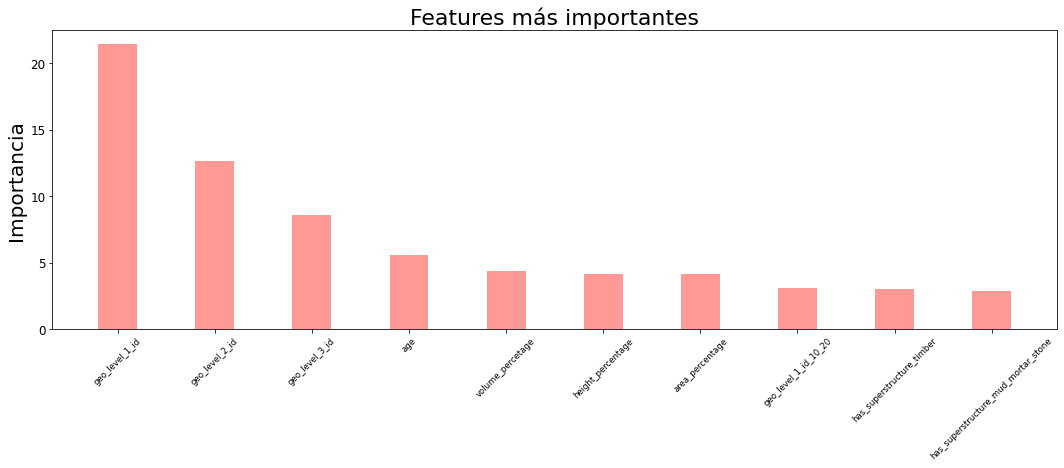

In [56]:
features_names = list(feature_importance['Feature Id'][0:10])
feature_importances = list(feature_importance['Importances'][0:10])

fig = plt.figure(figsize = (18, 5.5)) 
plt.rc('xtick',labelsize=8.5)
plt.rc('ytick',labelsize=12)
plt.bar(features_names, feature_importances, color ='#ff9995', width = 0.4)
plt.title("Features más importantes", fontsize=22)
plt.ylabel("Importancia", fontsize=20)
plt.xticks(rotation=45)
plt.show()

# Hacemos las predicciones para el set de Test. 

In [57]:
prediccionesFinales = finalModel.predict(test_values)

# Submission de Resultados.

In [58]:
my_submission = pd.DataFrame(data=prediccionesFinales,
                             columns=submission_format.columns,
                             index=submission_format.index)

my_submission.damage_grade = my_submission.damage_grade.round()

my_submission.damage_grade = my_submission.damage_grade.astype(int)

my_submission.to_csv('submissionCatboost.csv')